<center> # Naiwny klasyfikator bayesowski</center>

Celem ćwiczenia jest zapoznanie się z technikami konstrukcji naiwnego klasywikatora bayesowskiego. 

Ćwiczenie oparte jest o artykuł z [linku](https://www.kaggle.com/prashant111/naive-bayes-classifier-in-python/notebook)

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Na początku proszę wczytać plik __data.csv__ używając jako separatora ',':

In [2]:
df = pd.read_csv('data.csv', sep=',')
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


W następnie sprawdź które z kolumn zawierają dane tekstowe lub liczbowe. W tym celu sprawdź wartość  argumentu *dtype* z odpowiednim warunkiem:

In [3]:
categorical = [var for var in df.columns if df[var].dtype=='O']
numerical = [var for var in df.columns if df[var].dtype!='O']

print('Dane tektowe zawierają kolumny :\n\n', categorical)


Dane tektowe zawierają kolumny :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


Sprawdź czy dane w kolumnach nie zawierają braków a jeżeli tak uzupełnij je według znanych Ci metod:

In [4]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
df['workclass'].replace(' ?', np.NaN, inplace=True)
df['occupation'].replace(' ?', np.NaN, inplace=True)
df['native_country'].replace(' ?', np.NaN, inplace=True)
print(df[categorical].isnull().sum())
df[numerical].isnull().sum()

df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)
df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)
df['native_country'].fillna(df['native_country'].mode()[0], inplace=True)

workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
income               0
dtype: int64


Na przygotowanych danych przeprowadź proces tworzenia zbiorów uczących i testowych, tak by klasyfikator rozpoznawał do której z grup w kolumnie 'income' należy opisywana osoba


In [6]:
X = df.drop(['income'], axis=1)
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Przy pomocy biblioteki [category_encoders](https://contrib.scikit-learn.org/category_encoders/) przeprowadź proces kodowania zmiennych tektowych z pozostałych kategorii na wartości liczbowe:

In [7]:
import category_encoders as ce
#print(categorical)
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

Używając [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) przeprowadź klasyfikację daych ze zbiorów testowych i treningowych. Podaj dokładnosć modelu i macierz błędu wraz z jej wykresem i interpretacją.

In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

y_pred


array([' <=50K', ' <=50K', ' <=50K', ..., ' >50K', ' <=50K', ' <=50K'],
      dtype='<U6')

Accuracy 0.7974204115057836
              precision    recall  f1-score   support

       <=50K       0.81      0.95      0.88      7407
        >50K       0.67      0.32      0.43      2362

    accuracy                           0.80      9769
   macro avg       0.74      0.63      0.65      9769
weighted avg       0.78      0.80      0.77      9769



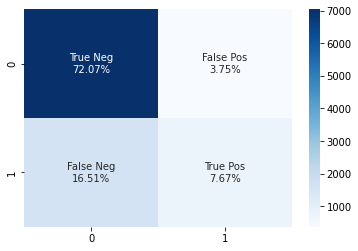

In [9]:
print("Accuracy", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cf_matrix = confusion_matrix(y_test, y_pred)
prediction = gnb.predict_proba(X_test)[:,1]
labels = ['True Neg','False Pos','False Neg','True Pos']
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(labels, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.show()

## race

Przprowadź uczenie klasyfikatora dla kolumn *race* i *native_country*. Podaj dokładnosć modeli i macierze błędu wraz z ich wykresami i interpretacją. Przedstaw wnioski od czego zależą otrzymane wyniki

Accuracy 0.8478861705394616


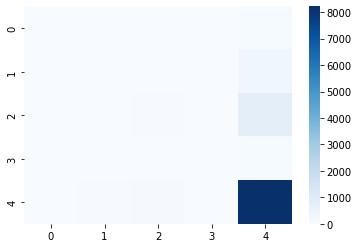

In [10]:
X = df.drop(['race'], axis=1)
y = df['race']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#print(categorical)
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'income', 'sex', 'native_country'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)


print("Accuracy", accuracy_score(y_test, y_pred))
#print(classification_report(y_test, y_pred))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, fmt='', cmap='Blues')
plt.show()

## native_country

Accuracy 0.05793837649708261
                             precision    recall  f1-score   support

                   Cambodia       0.00      0.00      0.00         4
                     Canada       0.00      0.00      0.00        37
                      China       0.00      0.00      0.00        17
                   Columbia       0.00      0.00      0.00        13
                       Cuba       0.00      0.00      0.00        25
         Dominican-Republic       0.00      0.00      0.00        23
                    Ecuador       0.00      0.00      0.00         4
                El-Salvador       0.00      0.00      0.00        37
                    England       0.00      0.00      0.00        29
                     France       0.00      0.00      0.00         9
                    Germany       0.00      0.00      0.00        49
                     Greece       0.00      0.00      0.00        10
                  Guatemala       0.00      0.00      0.00        16
    

C:\Users\Uzytkownik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Uzytkownik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Uzytkownik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classificatio

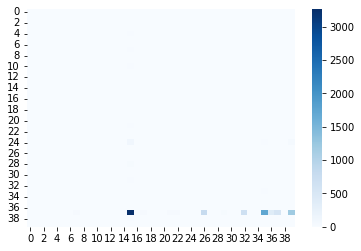

In [11]:
X = df.drop(['native_country'], axis=1)
y = df['native_country']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

encoder = encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'income', 'sex', 'race'])
X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)
# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

y_pred


print("Accuracy", accuracy_score(y_test, y_pred))

cf_matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
sns.heatmap(cf_matrix, fmt='', cmap='Blues')
plt.show()